# COVID Data Visualization for 5 regions

In [23]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit
from custuntions import phase_mask, line_plot, scatter_plot

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [24]:
xls = pd.ExcelFile('14_Cities_weather_cases.xlsx')
df_abha = pd.read_excel(xls, 'abha')
df_najran = pd.read_excel(xls, 'najran')
df_sharoura = pd.read_excel(xls, 'sharoura')
df_qurayat = pd.read_excel(xls, 'qurayat')
df_tabuk = pd.read_excel(xls, 'tabuk')
df_hail = pd.read_excel(xls, 'hail')
df_jed = pd.read_excel(xls, 'JED')
df_mak = pd.read_excel(xls, 'MAK')
df_taif = pd.read_excel(xls, 'TAIF')
df_madina = pd.read_excel(xls, 'MAD')
df_riyadh = pd.read_excel(xls, 'RUH')
df_dam = pd.read_excel(xls, 'DAM')
df_hofuf = pd.read_excel(xls, 'HOFUF') 
df_jubail = pd.read_excel(xls, 'JUBAIL')
df_dam.rename({"datae":"date"}, axis=1, inplace=True)

In [25]:
dfs_southern = [df_abha, df_najran, df_sharoura]

In [26]:
dfs_northern = [df_qurayat, df_tabuk, df_hail]

In [27]:
dfs_western = [df_jed, df_mak, df_taif, df_madina]

In [28]:
dfs_eastern = [df_dam, df_hofuf, df_jubail]

In [29]:
df_list = [dfs_southern, dfs_northern, dfs_western, dfs_eastern]

In [30]:
for dfs in df_list:
    for df in dfs:
        df.drop(["LAT", "LON", "YEAR", "MO", "DY"], axis=1, inplace=True)
        try:
            df.index = df["date"]
            df.drop(["date"], axis=1, inplace=True)
        except KeyError:
            df.index = df["DATE"]
            df.drop(["DATE"], axis=1, inplace=True)
        df.index.names = ['DATE']
        df.drop(df.tail(2).index,inplace=True)
        

In [31]:
df_southern_mean = pd.concat(dfs_southern).groupby("DATE").mean()
df_northern_mean = pd.concat(dfs_northern).groupby("DATE").mean()
df_eastern_mean = pd.concat(dfs_eastern).groupby("DATE").mean()
df_western_mean = pd.concat(dfs_western).groupby("DATE").mean()

In [32]:
columns = {'PRECTOT': 'Precipitation (mm day-1)',
           'RH2M':'Relative Humidity at 2 Meters (%)',
           'T2MDEW': 'Dew/Frost Point at 2 Meters (C)',
           'T2M_MAX': 'Maximum Temperature at 2 Meters (C)',
           'T2M_MIN' :'Minimum Temperature at 2 Meters (C)',
           'T2M': 'Temperature at 2 Meters (C)',
           'WS50M_RANGE': 'Wind Speed Range at 50 Meters (m/s)',
           'WS10M_RANGE': 'Wind Speed Range at 10 Meters (m/s)'
}

## Southern Region (Testing)

In [33]:
df_southern_mean.rename(columns=columns, inplace=True)

In [34]:
df_southern_mean

,Precipitation (mm day-1),Relative Humidity at 2 Meters (%),Dew/Frost Point at 2 Meters (C),Maximum Temperature at 2 Meters (C),Minimum Temperature at 2 Meters (C),Temperature at 2 Meters (C),Wind Speed Range at 50 Meters (m/s),Wind Speed Range at 10 Meters (m/s),cases,recoveries,mortalities
DATE,,,,,,,,,,,
2020-03-01,0.000000,38.636667,7.126667,31.506667,15.863333,23.140000,5.673333,4.636667,NaN,NaN,NaN
2020-03-02,0.000000,35.163333,6.280000,31.566667,16.793333,23.490000,6.000000,4.496667,NaN,NaN,NaN
2020-03-03,0.000000,30.206667,2.373333,29.333333,14.976667,21.573333,5.736667,4.520000,NaN,NaN,NaN
2020-03-04,0.000000,36.876667,5.383333,29.650000,15.130000,21.760000,5.126667,4.536667,NaN,NaN,NaN
2020-03-05,0.000000,33.593333,4.060000,30.426667,15.440000,22.180000,5.356667,4.270000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-12,0.000000,24.186667,0.953333,33.090000,16.646667,24.250000,6.056667,4.483333,1.5,4.0,1.0
2021-03-13,0.000000,27.263333,3.660000,33.220000,16.706667,24.356667,6.526667,5.066667,2.5,2.5,NaN
2021-03-14,0.000000,27.413333,2.933333,31.960000,16.720000,23.593333,6.993333,5.146667,2.0,4.0,NaN


In [35]:
# phase one and phase 2 seperation here
phase1_southern_mean, phase2_southern_mean = phase_mask(df_southern_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [36]:
# dropping columns here
phase1_southern_mean = phase1_southern_mean.drop(["recoveries", "mortalities"], axis=1)
phase2_southern_mean = phase2_southern_mean.drop(["recoveries", "mortalities"], axis=1)

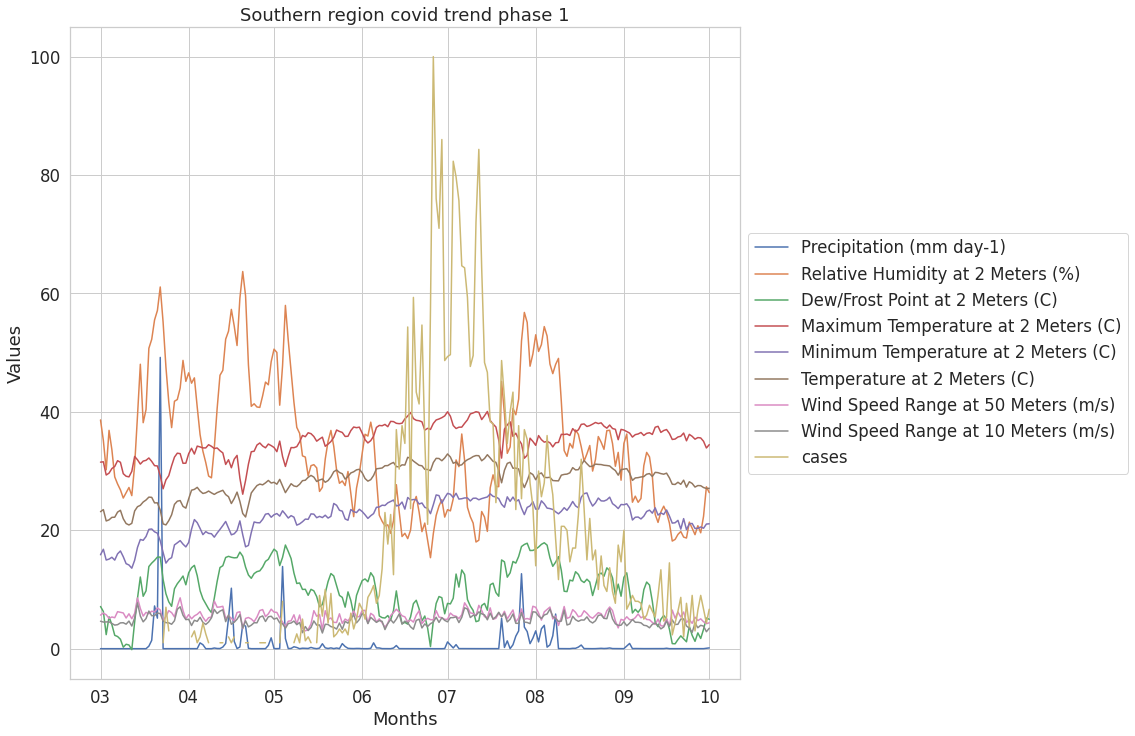

In [37]:
fig, ax = line_plot(phase1_southern_mean, "Southern region covid trend phase 1")

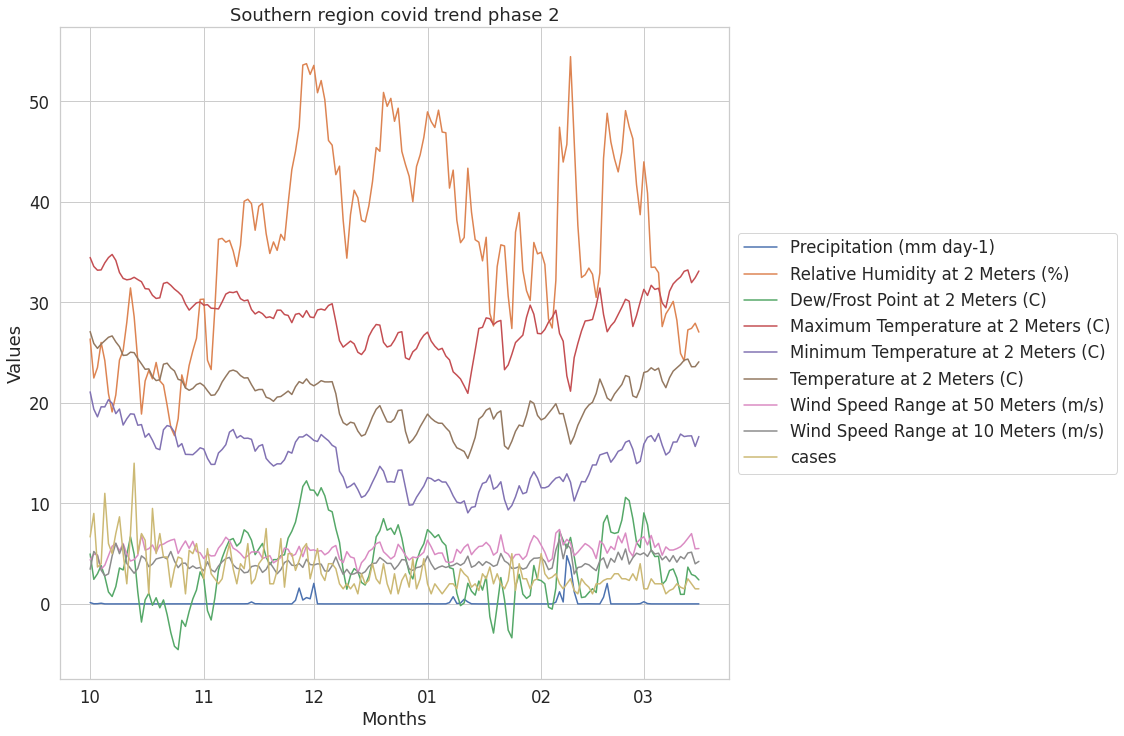

In [38]:
fig, ax = line_plot(phase2_southern_mean, "Southern region covid trend phase 2")

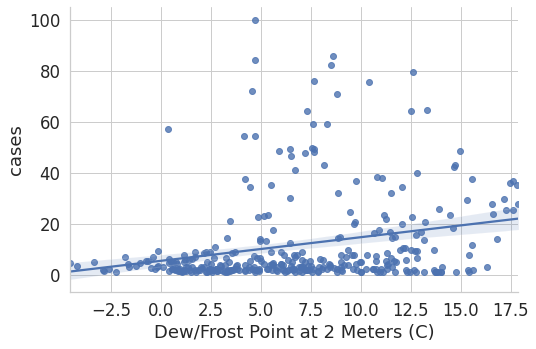

In [64]:
sns.pairplot(df_southern_mean, y_vars = "cases", x_vars = columns["T2MDEW"], height=5, aspect=1.5, kind='reg')

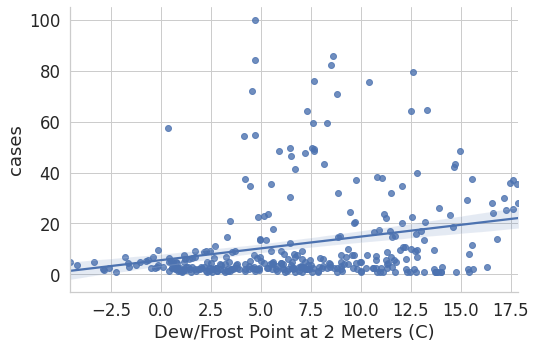

In [67]:
sns.pairplot(df_southern_mean, y_vars="cases", x_vars =columns["T2MDEW"], height=5, aspect=1.5, kind='reg')

In [21]:
def cubic_function(x, a, b):
    return ax + b
y = []

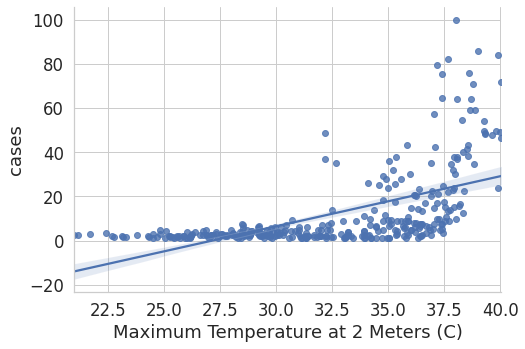

In [65]:
sns.pairplot(df_southern_mean, y_vars="cases", x_vars = columns["T2M_MAX"], height=5, aspect=1.5, kind='reg') 

In [ ]:
scatter_plot(df_southern_mean, "cases", columns["T2M_MIN"])

In [ ]:
scatter_plot(df_southern_mean, "cases", columns["T2M"])

In [ ]:
scatter_plot(df_southern_mean, "cases", columns["WS50M_RANGE"])

In [ ]:
scatter_plot(df_southern_mean, "cases", columns["WS10M_RANGE"])

## Nothern Region

In [ ]:
df_northern_mean.rename(columns=columns, inplace=True)

In [ ]:
df_northern_mean

In [ ]:
# phase one and phase 2 seperation here
phase1_northern_mean, phase2_northern_mean = phase_mask(df_northern_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [ ]:
# dropping columns here
phase1_northern_mean = phase1_northern_mean.drop(["recoveries", "mortalities"], axis=1)
phase2_northern_mean = phase2_northern_mean.drop(["recoveries", "mortalities"], axis=1)

In [ ]:
fig, ax = line_plot(phase1_northern_mean, "Nothern region covid trend phase 1")

In [ ]:
fig, ax = line_plot(phase2_northern_mean, "Nothern region covid trend phase 2")

In [ ]:
scatter_plot(df_northern_mean, "cases", columns["T2MDEW"])

In [ ]:
scatter_plot(df_northern_mean, "cases", columns["T2M_MAX"]) 

In [ ]:
scatter_plot(df_northern_mean, "cases", columns["T2M_MIN"])

In [ ]:
scatter_plot(df_northern_mean, "cases", columns["T2M"])

In [ ]:
scatter_plot(df_northern_mean, "cases", columns["WS50M_RANGE"])

In [ ]:
scatter_plot(df_northern_mean, "cases", columns["WS10M_RANGE"])

## Eastern Region

In [ ]:
df_eastern_mean.rename(columns=columns, inplace=True)

In [ ]:
df_eastern_mean

In [ ]:
# phase one and phase 2 seperation here
phase1_eastern_mean, phase2_eastern_mean = phase_mask(df_eastern_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [ ]:
# dropping columns here
phase1_eastern_mean = phase1_eastern_mean.drop(["recoveries", "mortalities"], axis=1)
phase2_eastern_mean = phase2_eastern_mean.drop(["recoveries", "mortalities"], axis=1)

In [ ]:
fig, ax = line_plot(phase1_eastern_mean, "Eastern region covid trend phase 1")

In [ ]:
fig, ax = line_plot(phase2_eastern_mean, "Eastern region covid trend phase 2")

In [ ]:
scatter_plot(df_eastern_mean, "cases", columns["T2MDEW"])

In [ ]:
scatter_plot(df_eastern_mean, "cases", columns["T2M_MAX"]) 

In [ ]:
scatter_plot(df_eastern_mean, "cases", columns["T2M_MIN"])

In [ ]:
scatter_plot(df_eastern_mean, "cases", columns["T2M"])

In [ ]:
scatter_plot(df_eastern_mean, "cases", columns["WS50M_RANGE"])

In [ ]:
scatter_plot(df_eastern_mean, "cases", columns["WS10M_RANGE"])

## Western Region

In [ ]:
df_western_mean.rename(columns=columns, inplace=True)

In [ ]:
df_western_mean

In [ ]:
# phase one and phase 2 seperation here
phase1_western_mean, phase2_western_mean = phase_mask(df_western_mean, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [ ]:
# dropping columns here
phase1_western_mean = phase1_western_mean.drop(["recoveries", "mortalities"], axis=1)
phase2_western_mean = phase2_western_mean.drop(["recoveries", "mortalities"], axis=1)

In [ ]:
fig, ax = line_plot(df_western_mean, "Western region covid trend phase 1")

In [ ]:
fig, ax = line_plot(df_western_mean, "Western region covid trend phase 2")

In [ ]:
scatter_plot(df_western_mean, "cases", columns["RH2M"]) 

In [ ]:
scatter_plot(df_western_mean, "cases", columns["T2MDEW"])

In [ ]:
scatter_plot(df_western_mean, "cases", columns["T2M_MAX"]) 

In [ ]:
scatter_plot(df_western_mean, "cases", columns["T2M_MIN"])

In [ ]:
scatter_plot(df_western_mean, "cases", columns["T2M"])

In [ ]:
scatter_plot(df_western_mean, "cases", columns["WS50M_RANGE"])

In [ ]:
scatter_plot(df_western_mean, "cases", columns["WS10M_RANGE"])

## Riyadh Region

In [ ]:
riyadh_columns = {'RH2M':'Relative Humidity at 2 Meters (%)',
                  'PS': 'Surface Pressure (kPa)',
                  'T2M_MAX': 'Maximum Temperature at 2 Meters (C)',
                  'T2M_MIN' :'Minimum Temperature at 2 Meters (C)',
                  'WS50M': 'Wind Speed Range at 50 Meters (m/s)',
                  'WS10M': 'Wind Speed Range at 10 Meters (m/s)'
}

In [ ]:
# cleaning up the data
df_riyadh.drop(["LAT", "LON", "YEAR", "MO", "DY"], axis=1, inplace=True)
df_riyadh.index = df_riyadh["DATE"]
df_riyadh.drop(["DATE"], axis=1, inplace=True)
df_riyadh.drop(df_riyadh.tail(2).index,inplace=True)

In [ ]:
# renaming columns
df_riyadh.rename(columns=riyadh_columns, inplace=True)

In [ ]:
df_riyadh

In [ ]:
# phase one and phase 2 seperation here
phase1_riyadh, phase2_riyadh = phase_mask(df_riyadh, "2020-03-01", "2020-10-01", "2020-10-01", "2021-03-16")

In [ ]:
# dropping columns here
phase1_riyadh = phase1_riyadh.drop(["recoveries", "mortalities"], axis=1)
phase2_riyadh = phase2_riyadh.drop(["recoveries", "mortalities"], axis=1)

In [ ]:
fig, ax = line_plot(phase1_riyadh, "Riyadh region covid trend phase 1")

In [ ]:
fig, ax = line_plot(phase2_riyadh, "Riyadh region covid trend phase 2")

In [ ]:
scatter_plot(df_riyadh, "cases", riyadh_columns["RH2M"])

In [ ]:
scatter_plot(df_riyadh, "cases", riyadh_columns["PS"])

In [ ]:
scatter_plot(df_riyadh, "cases", riyadh_columns["T2M_MAX"]) 

In [ ]:
scatter_plot(df_riyadh, "cases", riyadh_columns["T2M_MIN"])

In [ ]:
scatter_plot(df_riyadh, "cases", riyadh_columns["WS50M"])

In [ ]:
scatter_plot(df_riyadh, "cases", riyadh_columns["WS10M"])

## Converting region dataframes into excel files

In [ ]:
df_southern_mean.to_excel("Southern_weather_cases.xlsx") 
df_northern_mean.to_excel("northern_weather_cases.xlsx") 
df_eastern_mean.to_excel("eastern_weather_cases.xlsx") 
df_western_mean.to_excel("western_weather_cases.xlsx")
df_riyadh.to_excel("Riyadh_weather_cases.xlsx") 